## 计算物理第三次作业
姓名：王兴未 学号：2018302020138 班级：18级3班

**2.17** Investigate the trajectories of knuckleballs as a function of the angular velocity $\omega$, the initial angular orientation, and the (center of mass) velocity.

## 原理

棒球以相对地面的速度*v*射出，并且有方向与地面法线平行的角速度*ω*，以及有初始时棒球的朝向角*θ*。

在最开始，我们假定初始时球的出射方向与地面平行。以球的出射方向为x轴，球的角速度方向为y轴建立空间右手坐标系，并取出射点坐标为(0,1.7,0)（单位为m）

### 球的运动轨迹计算

利用Euler法，其原理为：
$$x_{i+1} - x_{i} = v_{x_{i}}dt$$
（y，z方向与之类似）

### 空气阻力对球轨迹的影响

球在运动过程中，在x，y，z方向上，均会受到空气阻力，公式为：
$$F_{drag}=-B_{2}v^2cos\alpha$$
其中α为速度方向与对应轴的夹角，如：
$$vcos\alpha=v_{x}$$
则此时有：
$$F_{drag,x}=-B_{2}vv_{x}$$
$$F_{drag,y}=-B_{2}vv_{y}$$
$$F_{drag,z}=-B_{2}vv_{z}$$
故可得到对应的微分方程：
$$\frac{dv_{x}}{dt}=\frac{-B_{2}}{m}vv_{x}$$
改写为Euler法，则为：
$$v_{x_{i+1}}-v_{x_{i}}=dv_{x}=\frac{-B_{2}}{m}vv_{x}dt$$
(y，z方向的方程类似）

在本题中，我们取：

$$\frac{B_{2}}{m}= 0.0039 + \frac{0.0058}{1 + e^{\frac{v - v_{d}}{\Delta}}}$$
其中：
$$v_{d} = 35 m/s$$
$$\Delta = 5m/s$$

### Magnus Force对球轨迹的影响

球在运动过程中由于旋转，导致在球左右两侧相对空气速度不同，空气对球的力也就不同，二者作差则会产生一个横向偏向力。

在一侧，空气对球的作用力正比于球相对空气的速度的平方，则：
$$F_{M} \propto (v + r\omega)^2 - (v - r\omega) ^2 \sim vr\omega$$
也即：
$$F_{M} = S_{0}\omega v_{x}$$
对于题中情况，该力的朝向为z轴负向，仅对z方向有影响。

类似的，我们可以得到对应的微分方程：(因方向为z轴负向，故加负号）
$$\frac{dv_{z}}{dt}=\frac{-S_{0}}{m}\omega v_{x}$$
和Euler法方程：
$$v_{z_{i+1}}-v_{z_{i}}=dv_{z}=\frac{-S_{0}}{m}\omega v_{x}dt$$
在本题中，我们取：
$$\frac{S_{0}}{m}=4.1\times10^{-4}$$

### 横向力对球轨迹的影响

由于棒球表面有缝线，导致其在两侧有不同的粗糙度，从而会受到空气给予的横向力。该横向力可由下式得出：
$$\frac{F_{lateral}}{mg}=0.5[sin(4\theta)-0.25sin(8\theta)+0.08sin(12\theta)-0.025sin(16\theta)]$$
这里θ为相对z轴正向的逆时针旋转角度，横向力方向为z轴正向。

则可得对应的微分方程：
$$\frac{dv_{z}}{dt}=\frac{F_{lateral}}{m}$$
和Euler法方程：
$$v_{z_{i+1}}-v_{z_{i}}=dv_{z}=\frac{F_{lateral}}{m}dt$$
$$v_{z_{i+1}}-v_{z_{i}}=0.5[sin(4\theta_{i})-0.25sin(8\theta_{i})+0.08sin(12\theta_{i})-0.025sin(16\theta_{i})]\times gdt$$
同时，θ与ω间又有关系：
$$\theta_{i+1} - \theta_{i} = \omega_{i}dt$$

### 总结
综上所述，我们可以得到对应的Euler法方程（加上y方向受到重力）：
$$x_{i+1} - x_{i} = v_{x_{i}}dt$$
$$y_{i+1} - y_{i} = v_{y_{i}}dt$$
$$z_{i+1} - z_{i} = v_{z_{i}}dt$$
$$v_{x_{i+1}}-v_{x_{i}}=dv_{x}=-\frac{B_{2}}{m}vv_{x}dt$$
$$v_{y_{i+1}}-v_{y_{i}}=dv_{y}=(-\frac{B_{2}}{m}vv_{y}- g)dt$$
$$v_{z_{i+1}}-v_{z_{i}}=dv_{z}=(-\frac{B_{2}}{m}vv_{z}- \frac{S_{0}}{m}\omega v_{x}dt + 0.5g[sin(4\theta_{i})-0.25sin(8\theta_{i})+0.08sin(12\theta_{i})-0.025sin(16\theta_{i})])dt$$
$$\theta_{i+1} - \theta_{i} = \omega_{i}dt$$

## 代码编写
首先，我们定义一个baseball类，并制定三个类参数：velocity，omega，theta。在计算过程中，取步长为0.01s，当x > 18时或y < 0时中止（投手丘距本垒板约18m），取投手投出球高度为1.7m。


随后，在类内定义几个计算加速度的函数，以及投球函数pitch()，画图函数plot()。最后应作出一个x-y图像，x-z图像和一个三维图像。

Please input the initial velocity of the baseball(m/s):30
Please input the angular velocity of the baseball(r/s):0.5
Please input the initial angle of the baseball(degree):52


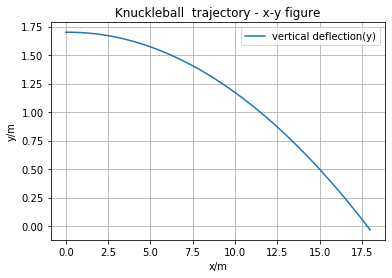

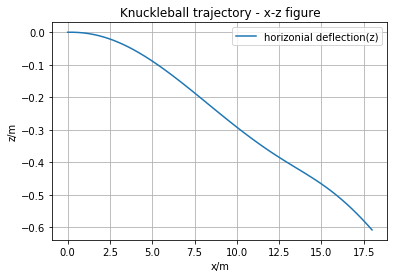

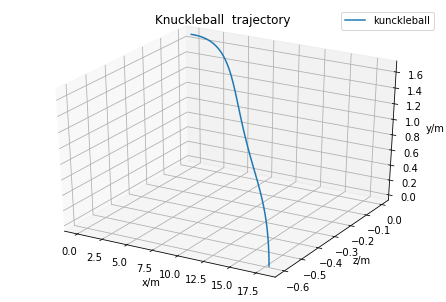

In [71]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

class baseball(object):
    def __init__(self, velocity, omega, theta, alpha = 0):
        self.v = [velocity]
        self.omega = omega
        self.theta = [theta]
        self.vx = [velocity * np.cos(alpha * np.pi / 180)]
        self.vy = [velocity * np.sin(alpha * np.pi / 180)]
        self.vz = [0]
        self.x = [0]
        self.y = [1.7]
        self.z = [0]
        self.dt = 0.01
        self.g = 9.8
        self.alpha = alpha
        
    def air_drag_x(self):
        return - 4e-5 * self.v[-1] * self.vx[-1]
    def air_drag_y(self):
        return - 4e-5 * self.v[-1] * self.vy[-1]
    def air_drag_z(self):
        return - 4e-5 * self.v[-1] * self.vz[-1]
    
    def magnus_force(self):
        return -4.1e-4 * self.omega * self.vx[-1]
    def lateral_force(self):
        return 0.5 * self.g * (np.sin(4 * self.theta[-1] * np.pi / 180) \
                               - 0.25 * np.sin(8 * self.theta[-1] * np.pi / 180) \
                               + 0.08 * np.sin(12 * self.theta[-1] * np.pi / 180) \
                               - 0.025 * np.sin(16 * self.theta[-1] * np.pi / 180))
    def pitch(self):
        while(self.x[-1] < 18 and self.y[-1] > 0):
            self.x.append(self.x[-1] + self.vx[-1] * self.dt)
            self.y.append(self.y[-1] + self.vy[-1] * self.dt)
            self.z.append(self.z[-1] + self.vz[-1] * self.dt)
            self.vx.append(self.vx[-1] + self.air_drag_x() * self.dt)
            self.vy.append(self.vy[-1] + (self.air_drag_y() - self.g) * self.dt)
            self.vz.append(self.vz[-1] + (self.air_drag_z() + self.magnus_force() + self.lateral_force()) * self.dt)
            self.v.append(np.sqrt(self.vx[-1] ** 2 + self.vy[-1] ** 2 + self.vy[-1] ** 2))
            self.theta.append(self.theta[-1] + self.omega * self.dt)
    
    def plot_xy(self):
        plt.plot(np.asarray(self.x), np.asarray(self.y), label = "vertical deflection(y)")
        plt.xlabel("x/m")
        plt.ylabel("y/m")
        plt.title("Knuckleball  trajectory - x-y figure")
        plt.legend()
        plt.grid()
        plt.show()
    def plot_xz(self):
        plt.plot(np.asarray(self.x), np.asarray(self.z), label = "horizonial deflection(z)")
        plt.xlabel("x/m")
        plt.ylabel("z/m")
        plt.title("Knuckleball trajectory - x-z figure")
        plt.legend()
        plt.grid()
        plt.show()
    
    def plot_3D(self):
        
        fig = plt.figure()
        ax = Axes3D(fig)
        plt.title("Knuckleball  trajectory")
        ax.set_xlabel("x/m")
        ax.set_ylabel("z/m")
        ax.set_zlabel("y/m")
        ax.plot(self.x, self.z, self.y, label = "kunckleball")
        plt.legend()
        plt.show()

velocity = float(input("Please input the initial velocity of the baseball(m/s):"))
omega = 360 * float(input("Please input the angular velocity of the baseball(r/s):"))
theta = float(input("Please input the initial angle of the baseball(degree):"))

ball = baseball(velocity, omega, theta)
ball.pitch()
ball.plot_xy()
ball.plot_xz()
ball.plot_3D()

## 讨论
我们已经得出了关于初速度v，角速度ω和初始朝向角θ的蝴蝶球图像，接下来就一些问题进行讨论

### ω对轨迹的影响
在上面的示例中，ω取0.8r/s，此时横向的轨迹非常难以捉摸。我们讨论在初速度v=40m/s（89.48mph, 144km/h），初始朝向θ=0情况下，ω在0.1-2.0r/s区间变化时横向位移的变化。

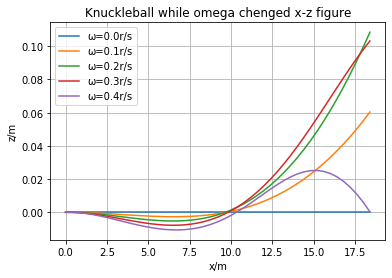

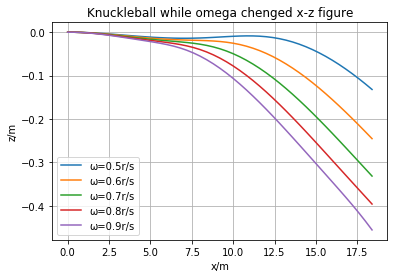

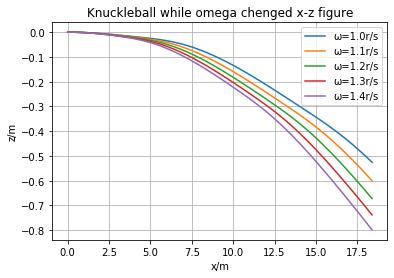

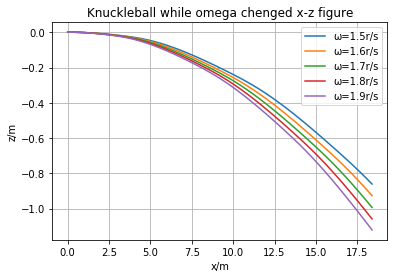

In [65]:
class test_omega(baseball):
    def plot_xz(self):
        plt.plot(np.asarray(self.x), np.asarray(self.z), label = "ω={:.1f}r/s".format(self.omega / 360))
        plt.xlabel("x/m")
        plt.ylabel("z/m")
        plt.title("Knuckleball while omega chenged x-z figure")
        plt.legend()
        plt.grid()
        
for omega in np.arange(0, 0.5, 0.1):
    test_ball_omega = test_omega(40, omega * 360, 0)
    test_ball_omega.pitch()
    test_ball_omega.plot_xz()
plt.show()
    
for omega in np.arange(0.5, 1.0, 0.1):
    test_ball_omega = test_omega(40, omega * 360, 0)
    test_ball_omega.pitch()
    test_ball_omega.plot_xz()
plt.show()
    
for omega in np.arange(1.0, 1.5, 0.1):
    test_ball_omega = test_omega(40, omega * 360, 0)
    test_ball_omega.pitch()
    test_ball_omega.plot_xz()
plt.show()
    
for omega in np.arange(1.5, 2.0, 0.1):
    test_ball_omega = test_omega(40, omega * 360, 0)
    test_ball_omega.pitch()
    test_ball_omega.plot_xz()
plt.show()

可以看到，当ω相对较小时，球的横向速度vz方向几乎不变。但当ω在0.4r/s时，出现了比较大的波动。随着ω增大，横向改变再一次变小。

综合来看，当ω在0.4r/s附近时，横向位移的变化花样较多，适合用于投蝴蝶球。

当然，此时的初速度v为144km/h，属于速球范围，这时候还想要变化那就属于要啥自行车范围了。我们可以进一步探讨约108km/h（30m/s， 67.11mph）的慢球情况下蝴蝶球的表现。

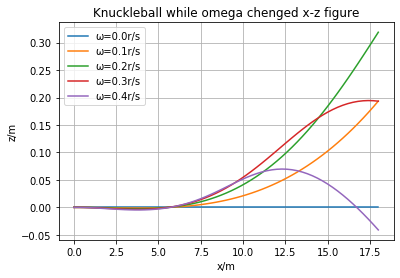

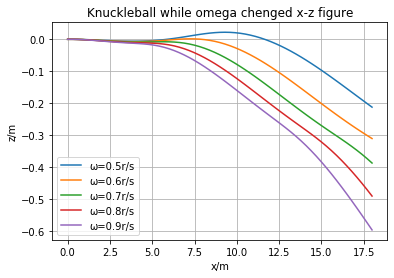

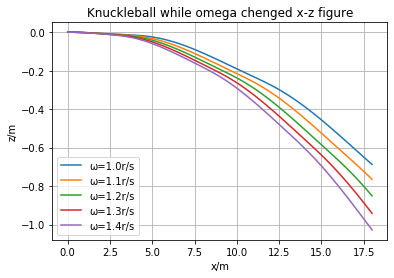

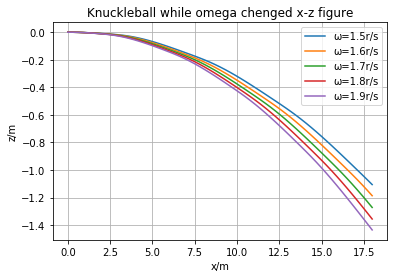

In [66]:
for omega in np.arange(0, 0.5, 0.1):
    test_ball_omega = test_omega(30, omega * 360, 0)
    test_ball_omega.pitch()
    test_ball_omega.plot_xz()
plt.show()
    
for omega in np.arange(0.5, 1.0, 0.1):
    test_ball_omega = test_omega(30, omega * 360, 0)
    test_ball_omega.pitch()
    test_ball_omega.plot_xz()
plt.show()
    
for omega in np.arange(1.0, 1.5, 0.1):
    test_ball_omega = test_omega(30, omega * 360, 0)
    test_ball_omega.pitch()
    test_ball_omega.plot_xz()
plt.show()
    
for omega in np.arange(1.5, 2.0, 0.1):
    test_ball_omega = test_omega(30, omega * 360, 0)
    test_ball_omega.pitch()
    test_ball_omega.plot_xz()
plt.show()

在较慢的球速情况下，蝴蝶球的水平位移达到了非常可观的程度。

蝴蝶球本身就以慢球速为特性，从上述讨论来看，较快的球速反而不利于轨迹变化。

但此时从高度上看，并不能落入好球区，实际上，会在本垒板前落地。接下来，我们讨论射高角α对轨迹的影响。

### 出射角度α对轨迹的影响
在之前的讨论中，我们一直默认出射角度α=0，这导致在较慢速度下球无法打入好球区。现在我们在初速度v=108km/h（30m/s），ω=0.8r/s，θ=0的情况下，讨论α在0-20°间变化对轨迹的影响。

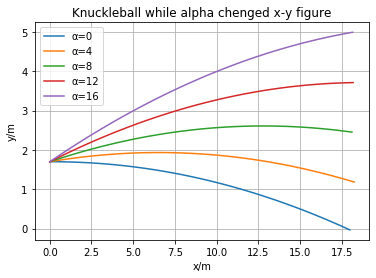

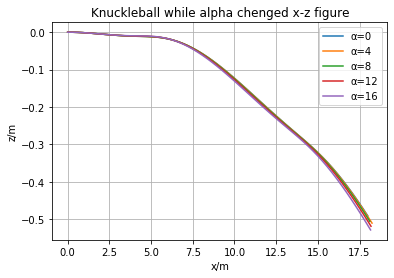

In [67]:
class test_alpha(baseball):
    def plot_xy(self):
        plt.plot(np.asarray(self.x), np.asarray(self.y), label = "α={}".format(self.alpha))
        plt.xlabel("x/m")
        plt.ylabel("y/m")
        plt.title("Knuckleball while alpha chenged x-y figure")
        plt.legend()
        plt.grid()
        
    def plot_xz(self):
        plt.plot(np.asarray(self.x), np.asarray(self.z), label = "α={}".format(self.alpha))
        plt.xlabel("x/m")
        plt.ylabel("z/m")
        plt.title("Knuckleball while alpha chenged x-z figure")
        plt.legend()
        plt.grid()
        
for alpha in range(0, 20, 4):
    test_ball_alpha = test_alpha(30, 0.8 * 360, 0, alpha)
    test_ball_alpha.pitch()
    test_ball_alpha.plot_xy()
plt.show()

for alpha in range(0, 20, 4):
    test_ball_alpha = test_alpha(30, 0.8 * 360, 0, alpha)
    test_ball_alpha.pitch()
    test_ball_alpha.plot_xz()
plt.show()

可以看到，当出射角度变化时，球的横向位移变化不大，但竖向位移变化很大。当α约为4°时，恰好能落入好球区。我们对这一小角度进一步进行讨论。

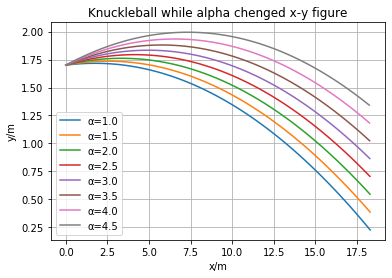

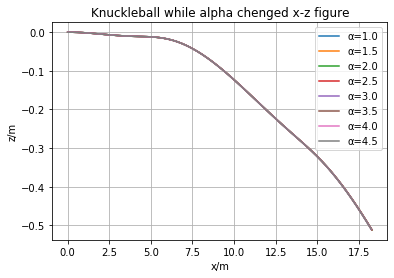

In [69]:
for alpha in np.arange(1, 5, 0.5):
    test_ball_alpha = test_alpha(30, 0.8 * 360, 0, alpha)
    test_ball_alpha.pitch()
    test_ball_alpha.plot_xy()
plt.grid()
plt.show()

for alpha in np.arange(1, 5, 0.5):
    test_ball_alpha = test_alpha(30, 0.8 * 360, 0, alpha)
    test_ball_alpha.pitch()
    test_ball_alpha.plot_xz()
plt.grid()
plt.show()

大约α=2°时，有一个相对较好的落入好球区的位置（刚好落入下边缘）

因此，投手在出射角度α进行较小的改变，就能在打击区带来非常大的变化。